<a href="https://colab.research.google.com/github/ahdelrawy/3D-segmentation/blob/main/liver_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/3d-liver-and-liver-tumor-segmentation")

print("Path to dataset files:", path)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.16G/2.16G [00:26<00:00, 88.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gauravduttakiit/3d-liver-and-liver-tumor-segmentation/versions/2


In [2]:
# 1. - ÿ´ÿ®ÿ™ ÿßŸÑÿ≠ÿ≤ŸÖ ÿßŸÑÿ£ÿ≥ÿßÿ≥Ÿäÿ©
!pip install -q git+https://github.com/qubvel/segmentation_models.pytorch
!pip install -q albumentations opencv-python-headless nibabel SimpleITK scikit-image plotly pyvista ipywidgets

# 2. - (ÿßÿÆÿ™Ÿäÿßÿ±Ÿä) ÿ™ÿßÿ®ÿπ ÿ≠ÿßŸÑÿ© torch ŸÅŸä ÿßŸÑŸÄ Colab
import torch
print("Torch:", torch.__version__, "CUDA available:", torch.cuda.is_available())


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 52.6/52.6 MB 18.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.4/2.4 MB 81.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 112.3/112.3 MB 7.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 36.6 MB/s eta 0:00:00
Torch: 2.8.0+cu126 CUDA available: True


In [3]:
import os

for root, dirs, files in os.walk("/content/data"):
    for f in files:
        print(os.path.join(root, f))


In [4]:
import kagglehub

# ŸÜÿ≤ŸëŸÑ ÿßŸÑÿØÿßÿ™ÿß
path = kagglehub.dataset_download("gauravduttakiit/3d-liver-and-liver-tumor-segmentation")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/gauravduttakiit/3d-liver-and-liver-tumor-segmentation/versions/2


In [5]:
import os

data_path = "/kaggle/input/3d-liver-and-liver-tumor-segmentation"

for root, dirs, files in os.walk(data_path):
    for f in files:
        print(os.path.join(root, f))


In [6]:
import os

data_path = "/kaggle/input/3d-liver-and-liver-tumor-segmentation/08-3D-Liver-Tumor-Segmentation/08-3D-Liver-Tumor-Segmentation/Task03_Liver_rs"

for root, dirs, files in os.walk(data_path):
    if "images" in root.lower():
        print("üì∑ Images folder:", root)
        for f in files[:5]:  # ÿ£ŸàŸÑ 5 ŸÖŸÑŸÅÿßÿ™ ÿ®ÿ≥
            print("   ", f)
    if "labels" in root.lower():
        print("üü¢ Labels folder:", root)
        for f in files[:5]:
            print("   ", f)


In [7]:
import os

print("Dataset root path:", path)
print("Subfolders inside:")
print(os.listdir(path))


Dataset root path: /root/.cache/kagglehub/datasets/gauravduttakiit/3d-liver-and-liver-tumor-segmentation/versions/2
Subfolders inside:
['08-3D-Liver-Tumor-Segmentation']


In [8]:
images_path = "/root/.cache/kagglehub/datasets/gauravduttakiit/3d-liver-and-liver-tumor-segmentation/versions/2/08-3D-Liver-Tumor-Segmentation/08-3D-Liver-Tumor-Segmentation/Task03_Liver_rs/images"
labels_path = "/root/.cache/kagglehub/datasets/gauravduttakiit/3d-liver-and-liver-tumor-segmentation/versions/2/08-3D-Liver-Tumor-Segmentation/08-3D-Liver-Tumor-Segmentation/Task03_Liver_rs/labels"

import os
print("Images:", os.listdir(images_path)[:5])
print("Labels:", os.listdir(labels_path)[:5])


Images: ['liver_129.nii', 'liver_50.nii', 'liver_58.nii', 'liver_115.nii', 'liver_49.nii']
Labels: ['liver_129.nii', 'liver_50.nii', 'liver_58.nii', 'liver_115.nii', 'liver_49.nii']


In [10]:
import os

def find_subfolder(root, name):
    for dirpath, dirnames, filenames in os.walk(root):
        if os.path.basename(dirpath) == name:
            return dirpath
    return None

images_path = find_subfolder(path, "images")
labels_path = find_subfolder(path, "labels")

print("Images path:", images_path)
print("Labels path:", labels_path)


Images path: /root/.cache/kagglehub/datasets/gauravduttakiit/3d-liver-and-liver-tumor-segmentation/versions/2/08-3D-Liver-Tumor-Segmentation/08-3D-Liver-Tumor-Segmentation/Task03_Liver_rs/images
Labels path: /root/.cache/kagglehub/datasets/gauravduttakiit/3d-liver-and-liver-tumor-segmentation/versions/2/08-3D-Liver-Tumor-Segmentation/08-3D-Liver-Tumor-Segmentation/Task03_Liver_rs/labels


Image shape: (232, 232, 200)
Mask shape: (232, 232, 200)


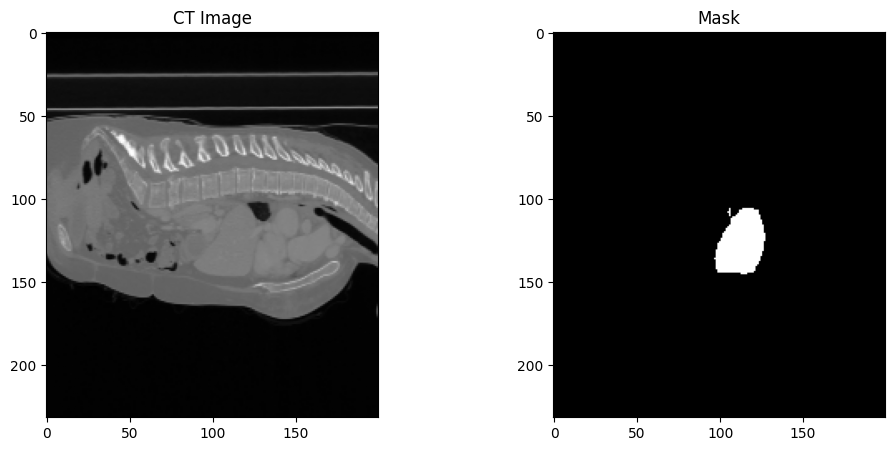

In [11]:
import nibabel as nib
import matplotlib.pyplot as plt

img_file = os.path.join(images_path, "liver_50.nii")
mask_file = os.path.join(labels_path, "liver_50.nii")

img = nib.load(img_file).get_fdata()
mask = nib.load(mask_file).get_fdata()

print("Image shape:", img.shape)
print("Mask shape:", mask.shape)

slice_idx = img.shape[0] // 2  # ÿ≥ŸÑÿßŸäÿ≥ ŸÅŸä ÿßŸÑŸÜÿµ

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img[slice_idx], cmap="gray")
plt.title("CT Image")

plt.subplot(1,2,2)
plt.imshow(mask[slice_idx], cmap="gray")
plt.title("Mask")
plt.show()


In [12]:
import torch
from torch.utils.data import Dataset
import numpy as np
import cv2

class LiverDataset(Dataset):
    def __init__(self, images_dir, labels_dir, transform=None, size=128):
        self.images = sorted(os.listdir(images_dir))
        self.labels = sorted(os.listdir(labels_dir))
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.size = size

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.images[idx])
        mask_path = os.path.join(self.labels_dir, self.labels[idx])

        img = nib.load(img_path).get_fdata()
        mask = nib.load(mask_path).get_fdata()

        # ŸÜÿßÿÆÿØ ŸÖŸÇÿ∑ÿπ Ÿàÿßÿ≠ÿØ (ŸÖÿ´ŸÑÿßŸã ÿßŸÑŸÜÿµ) - ŸÖŸÖŸÉŸÜ ÿ®ÿπÿØŸäŸÜ ŸÜÿßÿÆÿØ ÿ£ŸÉÿ™ÿ±
        slice_idx = img.shape[0] // 2
        img = img[slice_idx]
        mask = mask[slice_idx]

        # resize
        img = cv2.resize(img, (self.size, self.size))
        mask = cv2.resize(mask, (self.size, self.size))

        # normalize
        img = (img - img.min()) / (img.max() - img.min() + 1e-8)

        img = np.expand_dims(img, axis=0)  # (1,H,W)
        mask = np.expand_dims(mask, axis=0)  # (1,H,W)

        return torch.tensor(img, dtype=torch.float32), torch.tensor(mask, dtype=torch.float32)


In [13]:
from torch.utils.data import DataLoader

dataset = LiverDataset(images_path, labels_path, size=128)
loader = DataLoader(dataset, batch_size=2, shuffle=True)

img_batch, mask_batch = next(iter(loader))
print("Image batch shape:", img_batch.shape)
print("Mask batch shape:", mask_batch.shape)



Image batch shape: torch.Size([2, 1, 128, 128])
Mask batch shape: torch.Size([2, 1, 128, 128])


In [14]:
!pip install -q segmentation-models-pytorch


In [17]:
import segmentation_models_pytorch as smp

# U-Net ŸÖÿπ backbone pre-trained
model = smp.Unet(
    encoder_name="resnet34",        # backbone
    encoder_weights="imagenet",     # pretraining
    in_channels=1,                  # ÿµŸàÿ± CT channel Ÿàÿßÿ≠ÿØ (ŸÖÿ¥ RGB)
    classes=1,                      # binary segmentation (liver / not liver)
)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

In [16]:
!pip install torchmetrics


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 983.2/983.2 kB 24.7 MB/s eta 0:00:00


In [20]:
import torch

def dice_score(preds, targets, smooth=1e-6):
    # preds Ÿà targets binary tensors (0 ÿ£Ÿà 1)
    preds = preds.view(-1)
    targets = targets.view(-1)
    intersection = (preds * targets).sum()
    return (2. * intersection + smooth) / (preds.sum() + targets.sum() + smooth)

def iou_score(preds, targets, smooth=1e-6):
    # preds Ÿà targets binary tensors (0 ÿ£Ÿà 1)
    preds = preds.view(-1)
    targets = targets.view(-1)
    intersection = (preds * targets).sum()
    union = preds.sum() + targets.sum() - intersection
    return (intersection + smooth) / (union + smooth)

# ŸÖÿ´ÿßŸÑ ÿπŸÑŸâ ÿßÿ≥ÿ™ÿÆÿØÿßŸÖŸáŸÖ
outputs = torch.randn(2, 1, 128, 128)  # logits ŸÖŸÜ ÿßŸÑŸÖŸàÿØŸäŸÑ
masks = torch.randint(0, 2, (2, 1, 128, 128))  # ground truth

preds = torch.sigmoid(outputs) > 0.5  # ÿ™ÿ≠ŸàŸäŸÑ logits ŸÑŸÄ binary

dice = dice_score(preds, masks)
iou = iou_score(preds, masks)

print("Dice:", dice.item())
print("IoU:", iou.item())


Dice: 0.5023037195205688
IoU: 0.3353842496871948


In [22]:
import torch
import numpy as np

def normalize_image(image):
    # image: numpy array
    image = image.astype(np.float32)
    image = image / 255.0
    return image


In [23]:
import cv2

def resize_image_mask(image, mask, size=(128,128)):
    image_resized = cv2.resize(image, size, interpolation=cv2.INTER_LINEAR)
    mask_resized = cv2.resize(mask, size, interpolation=cv2.INTER_NEAREST)
    return image_resized, mask_resized


In [24]:
def to_tensor(image, mask):
    image = torch.tensor(image, dtype=torch.float32).unsqueeze(0) # shape: 1,H,W
    mask = torch.tensor(mask, dtype=torch.float32).unsqueeze(0)   # shape: 1,H,W
    return image, mask


In [25]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import cv2
import os

# ---- Dataset class ----
class LiverDataset(Dataset):
    def __init__(self, images_paths, masks_paths, img_size=(128,128), transform=None):
        self.images_paths = images_paths
        self.masks_paths = masks_paths
        self.img_size = img_size
        self.transform = transform

    def __len__(self):
        return len(self.images_paths)

    def __getitem__(self, idx):
        # ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿµŸàÿ±ÿ© ŸàÿßŸÑŸÄ mask
        image = cv2.imread(self.images_paths[idx], cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(self.masks_paths[idx], cv2.IMREAD_GRAYSCALE)

        # Resize
        image = cv2.resize(image, self.img_size, interpolation=cv2.INTER_LINEAR)
        mask = cv2.resize(mask, self.img_size, interpolation=cv2.INTER_NEAREST)

        # Normalize image
        image = image.astype(np.float32) / 255.0
        mask = mask.astype(np.float32) / 255.0
        mask = (mask > 0.5).astype(np.float32)  # binary mask

        # ÿ™ÿ≠ŸàŸäŸÑ ŸÑŸÄ tensor
        image = torch.tensor(image).unsqueeze(0)  # shape: 1,H,W
        mask = torch.tensor(mask).unsqueeze(0)    # shape: 1,H,W

        # ŸÑŸà ŸÅŸä augmentation
        if self.transform:
            # transform Ÿäÿ™ÿπÿßŸÖŸÑ ŸÖÿπ numpy arraysÿå ŸÑÿßÿ≤ŸÖ ÿ™ÿ±ÿ¨ÿπŸá tensors ÿ®ÿπÿØŸäŸÜ
            augmented = self.transform(image=image.numpy(), mask=mask.numpy())
            image = torch.tensor(augmented['image']).unsqueeze(0)
            mask = torch.tensor(augmented['mask']).unsqueeze(0)

        return image, mask


In [26]:
import os

!ls liver_data


ls: cannot access 'liver_data': No such file or directory


In [27]:
import os

data_folder = path  # path ÿØŸá ÿßŸÑŸÑŸä ÿ±ÿ¨ÿπŸá kagglehub.dataset_download

# ŸÑŸà ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÖŸàÿ¨ŸàÿØÿ© ÿØÿßÿÆŸÑ ŸÖÿ¨ŸÑÿØ ŸÅÿ±ÿπŸä ÿØÿßÿÆŸÑ Ÿáÿ∞ÿß ÿßŸÑŸÖÿ¨ŸÑÿØ
for root, dirs, files in os.walk(data_folder):
    print("Root:", root)
    print("Dirs:", dirs)
    print("ÿπÿØÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™:", len(files))
    break  # ŸÜÿ∑ÿ®ÿπ ÿ£ŸàŸÑ ŸÖÿ¨ŸÑÿØ ŸÅŸÇÿ∑ ÿπÿ¥ÿßŸÜ ŸÜÿ¥ŸàŸÅ ÿßŸÑÿ®ŸÜŸäÿ©


Root: /root/.cache/kagglehub/datasets/gauravduttakiit/3d-liver-and-liver-tumor-segmentation/versions/2
Dirs: ['08-3D-Liver-Tumor-Segmentation']
ÿπÿØÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™: 0


In [28]:
import os

data_folder = os.path.join(path, "08-3D-Liver-Tumor-Segmentation")

all_files = os.listdir(data_folder)
print("ÿπÿØÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉŸÑŸä:", len(all_files))
print(all_files)


ÿπÿØÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÉŸÑŸä: 1
['08-3D-Liver-Tumor-Segmentation']


In [29]:
sub_folder = os.path.join(data_folder, "08-3D-Liver-Tumor-Segmentation")
all_files = os.listdir(sub_folder)
print("ÿπÿØÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿØÿßÿÆŸÑ ÿßŸÑŸÖÿ¨ŸÑÿØ ÿßŸÑŸÅÿ±ÿπŸä:", len(all_files))
print(all_files)


ÿπÿØÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿØÿßÿÆŸÑ ÿßŸÑŸÖÿ¨ŸÑÿØ ÿßŸÑŸÅÿ±ÿπŸä: 1
['Task03_Liver_rs']


In [30]:
sub_sub_folder = os.path.join(sub_folder, "Task03_Liver_rs")
all_files = os.listdir(sub_sub_folder)
print("ÿπÿØÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÅŸä Task03_Liver_rs:", len(all_files))
print(all_files)


ÿπÿØÿØ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ŸÅŸä Task03_Liver_rs: 2
['labels', 'images']


In [31]:
images_folder = os.path.join(sub_sub_folder, "images")
masks_folder  = os.path.join(sub_sub_folder, "labels")

# ÿ¨ŸÖÿπ ŸÉŸÑ ŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿµŸàÿ± ŸàÿßŸÑŸÖÿßÿ≥ŸÉÿßÿ™
image_files = sorted([os.path.join(images_folder, f) for f in os.listdir(images_folder) if f.endswith(".nii.gz")])
mask_files  = sorted([os.path.join(masks_folder, f) for f in os.listdir(masks_folder) if f.endswith(".nii.gz")])

print("ÿπÿØÿØ ÿßŸÑÿµŸàÿ±:", len(image_files))
print("ÿπÿØÿØ ÿßŸÑŸÖÿßÿ≥ŸÉÿßÿ™:", len(mask_files))


ÿπÿØÿØ ÿßŸÑÿµŸàÿ±: 0
ÿπÿØÿØ ÿßŸÑŸÖÿßÿ≥ŸÉÿßÿ™: 0


In [32]:
import os

images_folder = os.path.join(sub_sub_folder, "images")
masks_folder  = os.path.join(sub_sub_folder, "labels")

print("ŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿµŸàÿ±:")
print(os.listdir(images_folder))

print("\nŸÖŸÑŸÅÿßÿ™ ÿßŸÑŸÖÿßÿ≥ŸÉÿßÿ™:")
print(os.listdir(masks_folder))


ŸÖŸÑŸÅÿßÿ™ ÿßŸÑÿµŸàÿ±:
['liver_129.nii', 'liver_50.nii', 'liver_58.nii', 'liver_115.nii', 'liver_49.nii', 'liver_36.nii', 'liver_40.nii', 'liver_89.nii', 'liver_113.nii', 'liver_84.nii', 'liver_93.nii', 'liver_8.nii', 'liver_70.nii', 'liver_21.nii', 'liver_80.nii', 'liver_18.nii', 'liver_120.nii', 'liver_35.nii', 'liver_43.nii', 'liver_53.nii', 'liver_116.nii', 'liver_42.nii', 'liver_102.nii', 'liver_4.nii', 'liver_125.nii', 'liver_17.nii', 'liver_123.nii', 'liver_81.nii', 'liver_19.nii', 'liver_16.nii', 'liver_79.nii', 'liver_77.nii', 'liver_76.nii', 'liver_3.nii', 'liver_38.nii', 'liver_54.nii', 'liver_122.nii', 'liver_22.nii', 'liver_99.nii', 'liver_26.nii', 'liver_74.nii', 'liver_94.nii', 'liver_98.nii', 'liver_6.nii', 'liver_73.nii', 'liver_128.nii', 'liver_9.nii', 'liver_57.nii', 'liver_34.nii', 'liver_23.nii', 'liver_7.nii', 'liver_52.nii', 'liver_0.nii', 'liver_92.nii', 'liver_105.nii', 'liver_37.nii', 'liver_64.nii', 'liver_69.nii', 'liver_5.nii', 'liver_41.nii', 'liver_61.nii

In [33]:
import os

images_folder = os.path.join(sub_sub_folder, "images")
masks_folder  = os.path.join(sub_sub_folder, "labels")

# ÿ¨ŸÖŸäÿπ ÿßŸÑŸÖŸÑŸÅÿßÿ™ ÿ®ÿµŸäÿ∫ÿ© .nii
image_files = sorted([os.path.join(images_folder, f) for f in os.listdir(images_folder) if f.endswith(".nii")])
mask_files  = sorted([os.path.join(masks_folder, f) for f in os.listdir(masks_folder) if f.endswith(".nii")])

print("ÿπÿØÿØ ÿßŸÑÿµŸàÿ±:", len(image_files))
print("ÿπÿØÿØ ÿßŸÑŸÖÿßÿ≥ŸÉÿßÿ™:", len(mask_files))

# ÿßŸÑÿ™ÿ£ŸÉÿØ ŸÖŸÜ ÿßŸÑÿ™ÿ∑ÿßÿ®ŸÇ
for i in range(5):
    print("Image:", os.path.basename(image_files[i]), "| Mask:", os.path.basename(mask_files[i]))


ÿπÿØÿØ ÿßŸÑÿµŸàÿ±: 123
ÿπÿØÿØ ÿßŸÑŸÖÿßÿ≥ŸÉÿßÿ™: 123
Image: liver_0.nii | Mask: liver_0.nii
Image: liver_1.nii | Mask: liver_1.nii
Image: liver_10.nii | Mask: liver_10.nii
Image: liver_101.nii | Mask: liver_101.nii
Image: liver_102.nii | Mask: liver_102.nii


In [34]:
import nibabel as nib
import torch
from torch.utils.data import Dataset
import numpy as np
import cv2

class LiverSliceDataset(Dataset):
    def __init__(self, image_files, mask_files, img_size=(128,128), transform=None):
        self.slices = []
        self.masks  = []
        self.img_size = img_size
        self.transform = transform

        # ÿ™ÿ≠ŸàŸäŸÑ ŸÉŸÑ 3D volume ÿ•ŸÑŸâ slices 2D
        for img_path, mask_path in zip(image_files, mask_files):
            img_nii = nib.load(img_path)
            mask_nii = nib.load(mask_path)

            img_array = img_nii.get_fdata()
            mask_array = mask_nii.get_fdata()

            # ÿ®ÿπÿ∂ ÿßŸÑŸÖÿßÿ≥ŸÉÿßÿ™ ŸÖŸÖŸÉŸÜ ŸÅŸäŸáÿß ŸÇŸäŸÖ ÿ∫Ÿäÿ± 0/1 ‚Üí ŸÜÿπŸÖŸÑ binary
            mask_array = (mask_array > 0).astype(np.float32)

            # ÿ™ÿ¨ÿ≤ÿ¶ÿ© ŸÉŸÑ slice ŸÖŸÜ ÿßŸÑ volume
            for i in range(img_array.shape[2]):  # ÿ∫ÿßŸÑÿ®Ÿãÿß axis 2 = slices
                slice_img = img_array[:,:,i]
                slice_mask = mask_array[:,:,i]

                # Resize
                slice_img = cv2.resize(slice_img, self.img_size, interpolation=cv2.INTER_LINEAR)
                slice_mask = cv2.resize(slice_mask, self.img_size, interpolation=cv2.INTER_NEAREST)

                # Normalize
                slice_img = slice_img.astype(np.float32) / np.max(slice_img)

                self.slices.append(slice_img)
                self.masks.append(slice_mask)

    def __len__(self):
        return len(self.slices)

    def __getitem__(self, idx):
        image = torch.tensor(self.slices[idx]).unsqueeze(0)  # shape: 1,H,W
        mask  = torch.tensor(self.masks[idx]).unsqueeze(0)   # shape: 1,H,W

        # ŸÑŸà ŸÅŸä augmentation
        if self.transform:
            augmented = self.transform(image=image.numpy(), mask=mask.numpy())
            image = torch.tensor(augmented['image']).unsqueeze(0)
            mask  = torch.tensor(augmented['mask']).unsqueeze(0)

        return image, mask


In [35]:
from torch.utils.data import DataLoader

dataset = LiverSliceDataset(image_files, mask_files, img_size=(128,128))
loader = DataLoader(dataset, batch_size=2, shuffle=True)

print("ÿπÿØÿØ ŸÉŸÑ ÿßŸÑ slices:", len(dataset))


/tmp/ipython-input-3260747674.py:35: RuntimeWarning: invalid value encountered in divide
  slice_img = slice_img.astype(np.float32) / np.max(slice_img)


ÿπÿØÿØ ŸÉŸÑ ÿßŸÑ slices: 19604


In [36]:
def __getitem__(self, idx):
    image = torch.tensor(self.slices[idx]).unsqueeze(0)  # shape: 1,H,W
    mask  = torch.tensor(self.masks[idx]).unsqueeze(0)   # shape: 1,H,W

    # ŸÑŸà ŸÅŸä augmentation
    if self.transform:
        augmented = self.transform(image=image.numpy(), mask=mask.numpy())
        image = torch.tensor(augmented['image']).unsqueeze(0)
        mask  = torch.tensor(augmented['mask']).unsqueeze(0)

    return image, mask


In [37]:
import os
import nibabel as nib
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import cv2

class LiverSliceDataset(Dataset):
    def __init__(self, image_files, mask_files, img_size=(128,128), transform=None):
        self.slices = []
        self.masks  = []
        self.img_size = img_size
        self.transform = transform

        # ÿ™ÿ≠ŸàŸäŸÑ ŸÉŸÑ 3D volume ÿ•ŸÑŸâ slices 2D
        for img_path, mask_path in zip(image_files, mask_files):
            img_nii = nib.load(img_path)
            mask_nii = nib.load(mask_path)

            img_array = img_nii.get_fdata()
            mask_array = mask_nii.get_fdata()

            # ÿ™ÿ≠ŸàŸäŸÑ ÿßŸÑŸÖÿßÿ≥ŸÉ ÿ•ŸÑŸâ binary
            mask_array = (mask_array > 0).astype(np.float32)

            # ÿ™ÿ¨ÿ≤ÿ¶ÿ© ŸÉŸÑ slice ŸÖŸÜ ÿßŸÑ volume
            for i in range(img_array.shape[2]):  # ÿ∫ÿßŸÑÿ®Ÿãÿß axis 2 = slices
                slice_img = img_array[:,:,i]
                slice_mask = mask_array[:,:,i]

                # Resize
                slice_img = cv2.resize(slice_img, self.img_size, interpolation=cv2.INTER_LINEAR)
                slice_mask = cv2.resize(slice_mask, self.img_size, interpolation=cv2.INTER_NEAREST)

                # Normalize ŸÖÿπ ÿ™ÿ¨ŸÜÿ® ÿßŸÑŸÇÿ≥ŸÖÿ© ÿπŸÑŸâ ÿµŸÅÿ±
                max_val = np.max(slice_img)
                if max_val > 0:
                    slice_img = slice_img.astype(np.float32) / max_val
                else:
                    slice_img = slice_img.astype(np.float32)

                self.slices.append(slice_img)
                self.masks.append(slice_mask)

    def __len__(self):
        return len(self.slices)

    def __getitem__(self, idx):
        image = torch.tensor(self.slices[idx]).unsqueeze(0)  # shape: 1,H,W
        mask  = torch.tensor(self.masks[idx]).unsqueeze(0)   # shape: 1,H,W

        # ŸÑŸà ŸÅŸä augmentation
        if self.transform:
            augmented = self.transform(image=image.numpy(), mask=mask.numpy())
            image = torch.tensor(augmented['image']).unsqueeze(0)
            mask  = torch.tensor(augmented['mask']).unsqueeze(0)

        return image, mask


# ======== ÿßÿ≥ÿ™ÿÆÿØÿßŸÖ ÿßŸÑŸÄ Dataset ========

images_folder = os.path.join(sub_sub_folder, "images")
masks_folder  = os.path.join(sub_sub_folder, "labels")

image_files = sorted([os.path.join(images_folder, f) for f in os.listdir(images_folder) if f.endswith(".nii")])
mask_files  = sorted([os.path.join(masks_folder, f) for f in os.listdir(masks_folder) if f.endswith(".nii")])

dataset = LiverSliceDataset(image_files, mask_files, img_size=(128,128))
print("ÿπÿØÿØ ŸÉŸÑ ÿßŸÑ slices:", len(dataset))

# ÿ™ÿ¨ÿ±ÿ®ÿ© ÿ£ŸàŸÑ slice
image, mask = dataset[0]
print("ÿ¥ŸÉŸÑ ÿßŸÑÿµŸàÿ±ÿ©:", image.shape)
print("ÿ¥ŸÉŸÑ ÿßŸÑŸÖÿßÿ≥ŸÉ:", mask.shape)

# ÿ•ŸÜÿ¥ÿßÿ° DataLoader
loader = DataLoader(dataset, batch_size=2, shuffle=True)


ÿπÿØÿØ ŸÉŸÑ ÿßŸÑ slices: 19604
ÿ¥ŸÉŸÑ ÿßŸÑÿµŸàÿ±ÿ©: torch.Size([1, 128, 128])
ÿ¥ŸÉŸÑ ÿßŸÑŸÖÿßÿ≥ŸÉ: torch.Size([1, 128, 128])


In [38]:
!pip install segmentation-models-pytorch --quiet

import torch
import torch.nn as nn
import segmentation_models_pytorch as smp


In [39]:
model = smp.Unet(
    encoder_name="resnet34",        # backbone ŸÖŸèÿ≥ÿ®ŸÇ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®
    encoder_weights="imagenet",     # pretraining weights
    in_channels=1,                  # grayscale images
    classes=1,                      # binary segmentation (liver / background)
)


In [40]:
# Loss
loss_fn = smp.losses.DiceLoss(mode='binary', from_logits=True)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Metrics
def iou_score(preds, targets, threshold=0.5):
    preds = torch.sigmoid(preds) > threshold
    intersection = (preds & targets.bool()).float().sum((1,2,3))
    union = (preds | targets.bool()).float().sum((1,2,3))
    return (intersection / (union + 1e-6)).mean()

def fscore(preds, targets, threshold=0.5):
    preds = torch.sigmoid(preds) > threshold
    tp = (preds & targets.bool()).float().sum((1,2,3))
    fp = (preds & ~targets.bool()).float().sum((1,2,3))
    fn = (~preds & targets.bool()).float().sum((1,2,3))
    return (2*tp / (2*tp + fp + fn + 1e-6)).mean()


In [41]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)


In [42]:
num_epochs = 5  # ŸÖŸÖŸÉŸÜ ÿ™ÿ≤ŸàÿØŸá ÿ®ÿπÿØ ŸÉÿØŸá
batch_size = 2

# ŸÑŸà ŸÖÿ¥ ÿπÿßŸÖŸÑŸÜÿß DataLoader ŸÇÿ®ŸÑ ŸÉÿØŸá
from torch.utils.data import DataLoader
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    epoch_iou = 0
    epoch_fscore = 0

    for images, masks in loader:
        images = images.to(device, dtype=torch.float32)
        masks  = masks.to(device, dtype=torch.float32)

        optimizer.zero_grad()
        outputs = model(images)

        loss = loss_fn(outputs, masks)
        loss.backward()
        optimizer.step()

        # ÿßÿ≠ÿ≥ÿ® metrics
        epoch_loss += loss.item()
        epoch_iou += iou_score(outputs, masks).item()
        epoch_fscore += fscore(outputs, masks).item()

    # ŸÖÿ™Ÿàÿ≥ÿ∑ ÿßŸÑŸÇŸäŸÖ ŸÑŸÉŸÑ epoch
    epoch_loss /= len(loader)
    epoch_iou /= len(loader)
    epoch_fscore /= len(loader)

    print(f"Epoch [{epoch+1}/{num_epochs}] | Loss: {epoch_loss:.4f} | IoU: {epoch_iou:.4f} | F-score: {epoch_fscore:.4f}")


Epoch [1/5] | Loss: 0.1365 | IoU: 0.2112 | F-score: 0.2431
Epoch [2/5] | Loss: 0.0896 | IoU: 0.2450 | F-score: 0.2714
Epoch [3/5] | Loss: 0.0751 | IoU: 0.2557 | F-score: 0.2795
Epoch [4/5] | Loss: 0.0678 | IoU: 0.2609 | F-score: 0.2830
Epoch [5/5] | Loss: 0.0639 | IoU: 0.2645 | F-score: 0.2860


In [43]:
model.eval()
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)


Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [ ]:
def dice_score(preds, targets, threshold=0.5):
    preds = (torch.sigmoid(preds) > threshold).float()
    intersection = (preds * targets).sum(dim=(1,2,3))
    union = (preds + targets).sum(dim=(1,2,3))
    dice = (2*intersection / (union + 1e-6)).mean()
    return dice

def iou_score(preds, targets, threshold=0.5):
    preds = (torch.sigmoid(preds) > threshold).float()
    intersection = (preds * targets).sum(dim=(1,2,3))
    union = (preds + targets - preds*targets).sum(dim=(1,2,3))
    iou = (intersection / (union + 1e-6)).mean()
    return iou

def accuracy_score(preds, targets, threshold=0.5):
    preds = (torch.sigmoid(preds) > threshold).float()
    correct = (preds == targets).float().sum()
    total = torch.numel(targets)
    return (correct / total)


In [45]:
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider
import numpy as np
import torch


In [47]:
def show_slice_interactive(slice_idx=0, alpha=0.5):
    """
    slice_idx: ÿ±ŸÇŸÖ ÿßŸÑŸÄ slice ÿßŸÑŸÑŸä ÿπÿßŸäÿ≤ÿ© ÿ™ÿπÿ±ÿ∂ŸäŸá
    alpha: ÿ¥ŸÅÿßŸÅŸäÿ© ÿßŸÑŸÄ mask
    """
    # ÿßÿÆÿ™ÿßÿ± ÿßŸÑÿµŸàÿ±ÿ© ŸàÿßŸÑŸÖÿßÿ≥⁄©
    image, mask = dataset[slice_idx]
    image = image[0].numpy()
    mask  = mask[0].numpy()

    # prediction
    model.eval()
    with torch.no_grad():
        pred = torch.sigmoid(model(image.unsqueeze(0).to(device))).cpu()[0,0].numpy()
        pred_bin = (pred > 0.5).astype(np.float32)

    # ÿπÿ±ÿ∂ ÿßŸÑÿµŸàÿ±ÿ© ŸÖÿπ ÿßŸÑŸÄ mask ŸàÿßŸÑŸÄ prediction
    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap='gray')
    plt.imshow(mask, cmap='Reds', alpha=alpha)      # mask ÿ≠ŸÖÿ±ÿßÿ°
    plt.imshow(pred_bin, cmap='Blues', alpha=alpha) # prediction ÿ≤ÿ±ŸÇÿßÿ°
    plt.axis('off')
    plt.show()


In [50]:
import matplotlib.pyplot as plt
import torch
import numpy as np


In [51]:
def show_image_mask_pred(slice_idx=0, threshold=0.5):
    """
    slice_idx: ÿ±ŸÇŸÖ ÿßŸÑŸÄ slice
    threshold: cutoff ŸÑŸÑŸÄ prediction
    """
    # ÿßŸÑÿµŸàÿ±ÿ© ŸàÿßŸÑŸÖÿßÿ≥⁄©
    image, mask = dataset[slice_idx]
    image = image[0].numpy()
    mask  = mask[0].numpy()

    # prediction
    model.eval()
    with torch.no_grad():
        input_tensor = image.unsqueeze(0).unsqueeze(0).to(device, dtype=torch.float32)  # [1,1,H,W]
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.float32)

    # ÿπÿ±ÿ∂
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(image, cmap='gray')
    plt.imshow(mask, cmap='Reds', alpha=0.5)
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(image, cmap='gray')
    plt.imshow(pred_bin, cmap='Blues', alpha=0.5)
    plt.axis('off')

    plt.show()


In [52]:
def show_image_mask_pred(slice_idx=0, threshold=0.5):
    """
    slice_idx: ÿ±ŸÇŸÖ ÿßŸÑŸÄ slice
    threshold: cutoff ŸÑŸÑŸÄ prediction
    """
    # ÿßŸÑÿµŸàÿ±ÿ© ŸàÿßŸÑŸÖÿßÿ≥⁄©
    image, mask = dataset[slice_idx]
    image = image[0].numpy()
    mask  = mask[0].numpy()

    # prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)  # [1,1,H,W]
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.float32)

    # ÿπÿ±ÿ∂
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(image, cmap='gray')
    plt.imshow(mask, cmap='Reds', alpha=0.5)
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(image, cmap='gray')
    plt.imshow(pred_bin, cmap='Blues', alpha=0.5)
    plt.axis('off')

    plt.show()


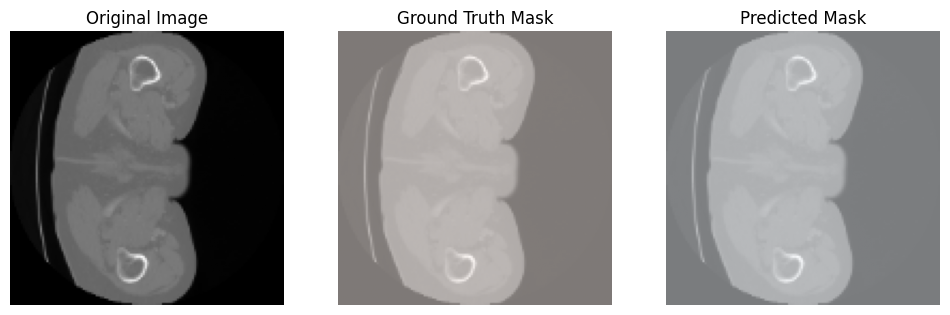

In [53]:
show_image_mask_pred(slice_idx=0, threshold=0.5)


In [54]:
def show_bw_image_mask_pred(slice_idx=0, threshold=0.5):
    image, mask = dataset[slice_idx]
    image = image[0].numpy()
    mask  = mask[0].numpy()

    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.float32)

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(mask, cmap='gray')   # ÿ£ÿ®Ÿäÿ∂ ÿπŸÑŸâ ÿ£ÿ≥ŸàÿØ
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(pred_bin, cmap='gray')  # prediction ÿ£ÿ®Ÿäÿ∂ ÿπŸÑŸâ ÿ£ÿ≥ŸàÿØ
    plt.axis('off')

    plt.show()


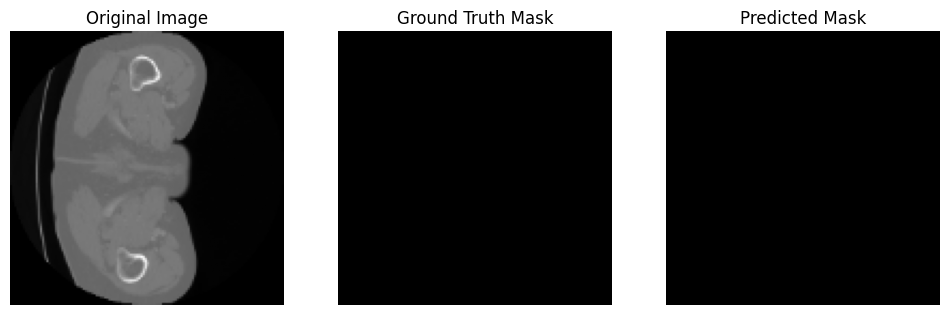

In [100]:
show_bw_image_mask_pred(slice_idx=0, threshold=0.5)


In [56]:
def show_bw_image_mask_pred(slice_idx=0, threshold=0.5):
    image, mask = dataset[slice_idx]
    image = image[0].numpy()
    mask  = mask[0].numpy() * 255  # ŸÖŸÜ 0-1 ŸÑŸÄ 0-255

    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.float32) * 255  # ÿ£ÿ®Ÿäÿ∂ ÿπŸÑŸâ ÿ£ÿ≥ŸàÿØ

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(mask, cmap='gray')   # ÿ£ÿ®Ÿäÿ∂ ÿπŸÑŸâ ÿ£ÿ≥ŸàÿØ
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(pred_bin, cmap='gray')  # prediction ÿ£ÿ®Ÿäÿ∂ ÿπŸÑŸâ ÿ£ÿ≥ŸàÿØ
    plt.axis('off')

    plt.show()


In [57]:
def show_bw_image_mask_pred(slice_idx=0, threshold=0.5):
    # ÿßŸÑÿµŸàÿ±ÿ© ŸàÿßŸÑŸÖÿßÿ≥⁄©
    image, mask = dataset[slice_idx]
    image = image[0].numpy()
    mask  = mask[0].numpy()

    # prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.uint8) * 255  # 0 ÿ£Ÿà 255
        mask_disp = (mask > 0).astype(np.uint8) * 255          # 0 ÿ£Ÿà 255

    # ÿπÿ±ÿ∂
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(mask_disp, cmap='gray')   # ÿ£ÿ®Ÿäÿ∂ ÿπŸÑŸâ ÿ£ÿ≥ŸàÿØ
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(pred_bin, cmap='gray')  # ÿ£ÿ®Ÿäÿ∂ ÿπŸÑŸâ ÿ£ÿ≥ŸàÿØ
    plt.axis('off')

    plt.show()


In [58]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def show_single_slice(slice_idx=0, threshold=0.5):
    # ÿßŸÑÿµŸàÿ±ÿ© ŸàÿßŸÑŸÖÿßÿ≥⁄©
    image, mask = dataset[slice_idx]
    image = image[0].numpy()
    mask  = mask[0].numpy()

    # prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.uint8) * 255  # ÿ£ÿ®Ÿäÿ∂ ÿπŸÑŸâ ÿ£ÿ≥ŸàÿØ
        mask_disp = (mask > 0).astype(np.uint8) * 255          # ÿ£ÿ®Ÿäÿ∂ ÿπŸÑŸâ ÿ£ÿ≥ŸàÿØ

    # ÿπÿ±ÿ∂
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(mask_disp, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(pred_bin, cmap='gray')
    plt.axis('off')

    plt.show()


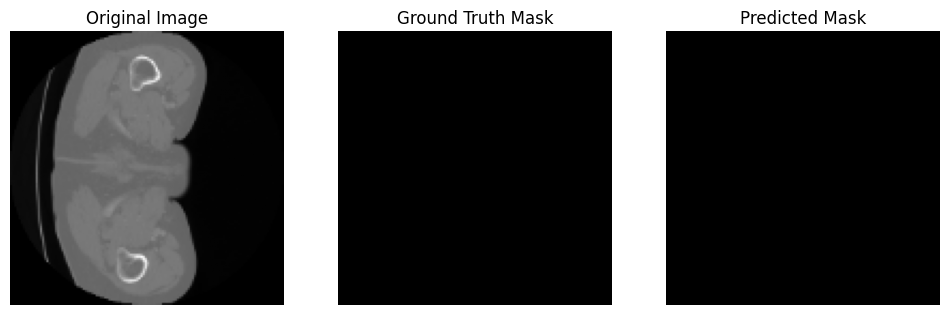

In [101]:
show_single_slice(slice_idx=0, threshold=0.5)



In [60]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def show_colored_slice(slice_idx=0, threshold=0.5):
    # ÿßŸÑÿµŸàÿ±ÿ© ŸàÿßŸÑŸÖÿßÿ≥⁄©
    image, mask = dataset[slice_idx]
    image = image[0].numpy()
    mask  = mask[0].numpy()

    # prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.float32)  # 0 ÿ£Ÿà 1
        mask_disp = (mask > 0).astype(np.float32)        # 0 ÿ£Ÿà 1

    # ÿπÿ±ÿ∂
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(image, cmap='gray')
    plt.imshow(mask_disp, cmap='Reds', alpha=0.5)   # mask ÿ£ÿ≠ŸÖÿ± ŸÜÿµŸÅ ÿ¥ŸÅÿßŸÅ
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(image, cmap='gray')
    plt.imshow(pred_bin, cmap='Blues', alpha=0.5)   # prediction ÿ£ÿ≤ÿ±ŸÇ ŸÜÿµŸÅ ÿ¥ŸÅÿßŸÅ
    plt.axis('off')

    plt.show()


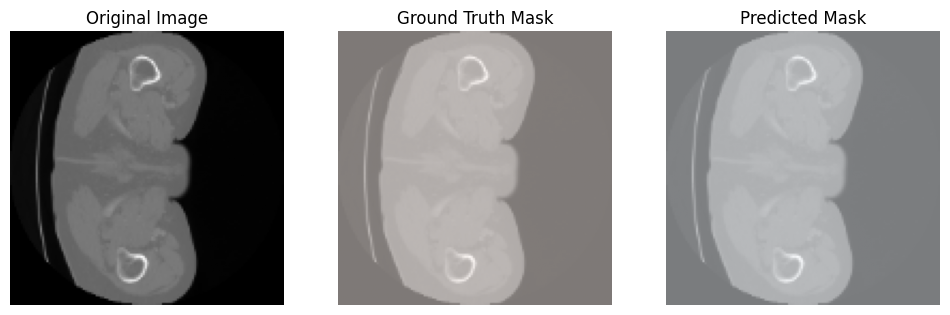

In [61]:
show_colored_slice(slice_idx=0, threshold=0.5)


In [62]:
import matplotlib.pyplot as plt
import torch
import numpy as np   # ‚Üê ŸáŸÜÿß ŸÉÿßŸÜ ÿßŸÑŸÜÿßŸÇÿµ

def show_colored_slice(slice_idx=0, threshold=0.5):
    # ÿßŸÑÿµŸàÿ±ÿ© ŸàÿßŸÑŸÖÿßÿ≥⁄©
    image, mask = dataset[slice_idx]
    image = image[0].numpy()
    mask  = mask[0].numpy()

    # prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = ((pred > threshold).astype(np.uint8)) * 255  # 0 ÿ£Ÿà 255
        mask_disp = ((mask > 0).astype(np.uint8)) * 255         # 0 ÿ£Ÿà 255

    # ÿπÿ±ÿ∂
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(image, cmap='gray')
    plt.imshow(mask_disp, cmap='Reds', alpha=0.5)
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(image, cmap='gray')
    plt.imshow(pred_bin, cmap='Blues', alpha=0.5)
    plt.axis('off')

    plt.show()


In [63]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def show_binary_slice(slice_idx=0, threshold=0.5):
    # ÿ™ÿ≠ŸÖŸäŸÑ ÿµŸàÿ±ÿ© Ÿà ŸÖÿßÿ≥ŸÉ
    image, mask = dataset[slice_idx]
    image = image[0].numpy()
    mask  = mask[0].numpy()

    # prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.uint8)   # 0 ÿ£Ÿà 1
        mask_bin = (mask > 0).astype(np.uint8)           # 0 ÿ£Ÿà 1

    # ÿπÿ±ÿ∂
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(mask_bin, cmap='gray')   # ÿ£ÿ≥ŸàÿØ/ÿ£ÿ®Ÿäÿ∂ ŸÅŸÇÿ∑
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(pred_bin, cmap='gray')   # ÿ£ÿ≥ŸàÿØ/ÿ£ÿ®Ÿäÿ∂ ŸÅŸÇÿ∑
    plt.axis('off')

    plt.show()


In [64]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def show_binary_slice(slice_idx=0, threshold=0.5):
    # ÿ™ÿ≠ŸÖŸäŸÑ ÿµŸàÿ±ÿ© Ÿà ŸÖÿßÿ≥ŸÉ
    image, mask = dataset[slice_idx]
    image = image[0].numpy()
    mask  = mask[0].numpy()

    # prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()

        # ÿ™ÿ≠ŸàŸäŸÑ ŸÑŸÑŸÄ uint8 0-255
        pred_bin = ((pred > threshold).astype(np.uint8)) * 255
        mask_bin = ((mask > 0).astype(np.uint8)) * 255

    # ÿπÿ±ÿ∂
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(mask_bin, cmap='gray')   # ÿ£ÿ≥ŸàÿØ/ÿ£ÿ®Ÿäÿ∂
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(pred_bin, cmap='gray')   # ÿ£ÿ≥ŸàÿØ/ÿ£ÿ®Ÿäÿ∂
    plt.axis('off')

    plt.show()


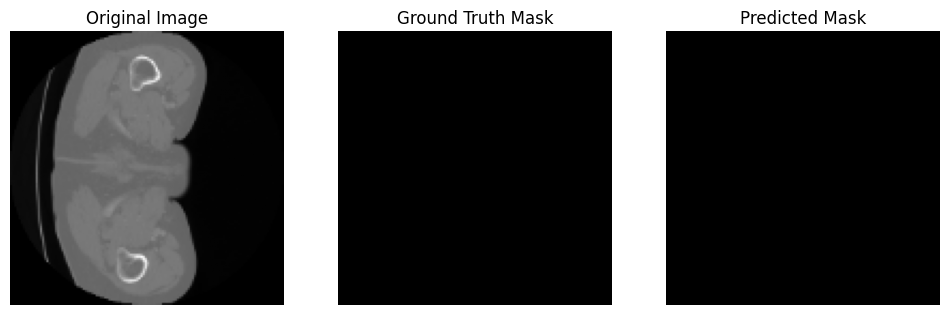

In [102]:
show_binary_slice(slice_idx=0, threshold=0.5)


In [66]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def show_binary_slice_safe(slice_idx=0, threshold=0.5):
    # ÿßŸÑÿµŸàÿ±ÿ© ŸàÿßŸÑŸÖÿßÿ≥⁄©
    image, mask = dataset[slice_idx]
    image = image[0].numpy().astype(np.float32)
    mask  = mask[0].numpy().astype(np.float32)

    # normalize ÿßŸÑÿµŸàÿ±ÿ© ŸÑŸÑÿπÿ±ÿ∂
    if np.max(image) > 0:
        image = image / np.max(image)

    # prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.float32)
        mask_bin = (mask > 0).astype(np.float32)

    # ÿπÿ±ÿ∂
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(mask_bin, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(pred_bin, cmap='gray')
    plt.axis('off')

    plt.show()


In [67]:
import matplotlib.pyplot as plt
import torch
import numpy as np

def show_first_nonzero_slice(threshold=0.5):
    # ÿßŸÑÿ®ÿ≠ÿ´ ÿπŸÜ ÿ£ŸàŸÑ slice ŸÅŸäŸá mask != 0
    for idx in range(len(dataset)):
        _, mask = dataset[idx]
        mask = mask[0].numpy()
        if np.max(mask) > 0:   # ŸÅŸäŸá ÿπÿ∂Ÿà
            slice_idx = idx
            break

    image, mask = dataset[slice_idx]
    image = image[0].numpy().astype(np.float32)
    mask  = mask[0].numpy().astype(np.float32)

    # normalize ÿßŸÑÿµŸàÿ±ÿ© ŸÑŸÑÿπÿ±ÿ∂
    if np.max(image) > 0:
        image = image / np.max(image)

    # prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.float32)
        mask_bin = (mask > 0).astype(np.float32)

    # ÿπÿ±ÿ∂
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(mask_bin, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(pred_bin, cmap='gray')
    plt.axis('off')

    plt.show()


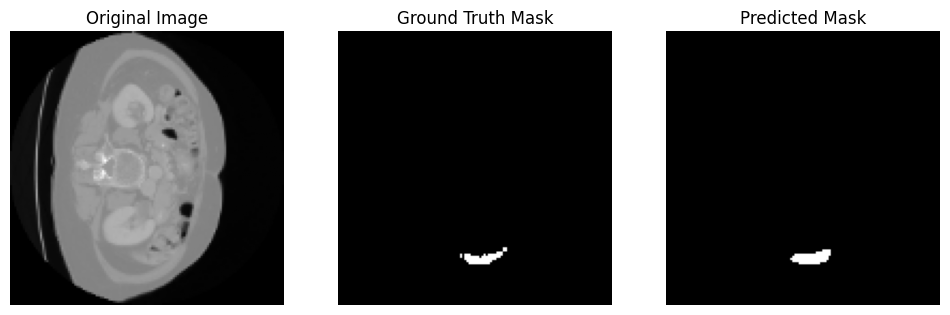

In [103]:
show_first_nonzero_slice(threshold=0.5)


In [70]:
!pip install segmentation-models-pytorch --quiet

import torch
import torch.nn as nn
import segmentation_models_pytorch as smp


In [71]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [72]:
# ŸÖŸàÿØŸäŸÑ LinkNet ŸÖÿπ encoder ŸÖÿØÿ±ÿ® ŸÖÿ≥ÿ®ŸÇŸãÿß ÿπŸÑŸâ ImageNet
model = smp.Linknet(
    encoder_name="resnet34",       # ÿßÿÆÿ™ÿßÿ±Ÿä encoder ŸÖŸÜÿßÿ≥ÿ®
    encoder_weights="imagenet",    # pretraining
    in_channels=1,                 # ÿπÿØÿØ ŸÇŸÜŸàÿßÿ™ ÿßŸÑÿµŸàÿ±ÿ© (CT = 1)
    classes=1                       # ÿπÿØÿØ ÿßŸÑŸÄ masks (binary)
).to(device)


In [73]:
from torch.utils.data import DataLoader, random_split

# ÿ™ŸÇÿ≥ŸäŸÖ dataset: 80% train Ÿà 20% val
train_size = int(0.8 * len(dataset))
val_size   = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=4, shuffle=False)

print("Train samples:", len(train_dataset))
print("Validation samples:", len(val_dataset))


Train samples: 15683
Validation samples: 3921


In [74]:
# Loss
loss_fn = smp.losses.DiceLoss(mode='binary', from_logits=True)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [76]:
import numpy as np
import torch

# ÿØŸàÿßŸÑ ÿßŸÑÿ™ŸÇŸäŸäŸÖ
def dice_coef(pred, target, smooth=1e-6):
    pred = pred.flatten()
    target = target.flatten()
    intersection = (pred * target).sum()
    return (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

def iou_score(pred, target, smooth=1e-6):
    pred = pred.flatten()
    target = target.flatten()
    intersection = (pred * target).sum()
    union = pred.sum() + target.sum() - intersection
    return (intersection + smooth) / (union + smooth)

def accuracy(pred, target):
    pred = (pred > 0.5).astype(np.float32)
    return (pred == target).mean()

# ÿßŸÑÿ™ŸÇŸäŸäŸÖ ÿπŸÑŸâ val_loader
model.eval()
dice_list = []
iou_list  = []
acc_list  = []

with torch.no_grad():
    for images, masks in val_loader:
        images = images.to(device, dtype=torch.float32)
        masks  = masks.to(device, dtype=torch.float32)

        outputs = torch.sigmoid(model(images))
        outputs_np = outputs.cpu().numpy()
        masks_np   = masks.cpu().numpy()

        for i in range(outputs_np.shape[0]):
            pred_i = (outputs_np[i,0] > 0.5).astype(np.float32)
            mask_i = masks_np[i,0].astype(np.float32)

            dice_list.append(dice_coef(pred_i, mask_i))
            iou_list.append(iou_score(pred_i, mask_i))
            acc_list.append(accuracy(pred_i, mask_i))

print(f"Dice: {np.mean(dice_list):.4f}")
print(f"IoU:   {np.mean(iou_list):.4f}")
print(f"Accuracy: {np.mean(acc_list):.4f}")


Dice: 0.0762
IoU:   0.0455
Accuracy: 0.5708


In [78]:
import matplotlib.pyplot as plt

def show_slice(slice_idx=0, threshold=0.5):
    # ÿ£ŸàŸÑŸãÿß ŸÜÿ¨Ÿäÿ® slice ŸÖŸÜ dataset
    image, mask = dataset[slice_idx]
    image = image[0].numpy().astype(np.float32)
    mask  = mask[0].numpy().astype(np.float32)

    # Normalize ÿßŸÑÿµŸàÿ±ÿ©
    if np.max(image) > 0:
        image = image / np.max(image)

    # Prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.float32)
        mask_bin = (mask > 0).astype(np.float32)

    # ÿπÿ±ÿ∂
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(mask_bin, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(pred_bin, cmap='gray')
    plt.axis('off')
    plt.show()


In [79]:
def show_first_nonzero_slice(threshold=0.5):
    # ÿßŸÑÿ®ÿ≠ÿ´ ÿπŸÜ ÿ£ŸàŸÑ slice ŸÅŸäŸá mask != 0
    for idx in range(len(dataset)):
        _, mask = dataset[idx]
        mask = mask[0].numpy()
        if np.max(mask) > 0:   # ŸÅŸäŸá ÿπÿ∂Ÿà
            slice_idx = idx
            break

    image, mask = dataset[slice_idx]
    image = image[0].numpy().astype(np.float32)
    mask  = mask[0].numpy().astype(np.float32)

    # Normalize ÿßŸÑÿµŸàÿ±ÿ©
    if np.max(image) > 0:
        image = image / np.max(image)

    # Prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.float32)
        mask_bin = (mask > 0).astype(np.float32)

    # ÿπÿ±ÿ∂
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(mask_bin, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(pred_bin, cmap='gray')
    plt.axis('off')

    plt.show()


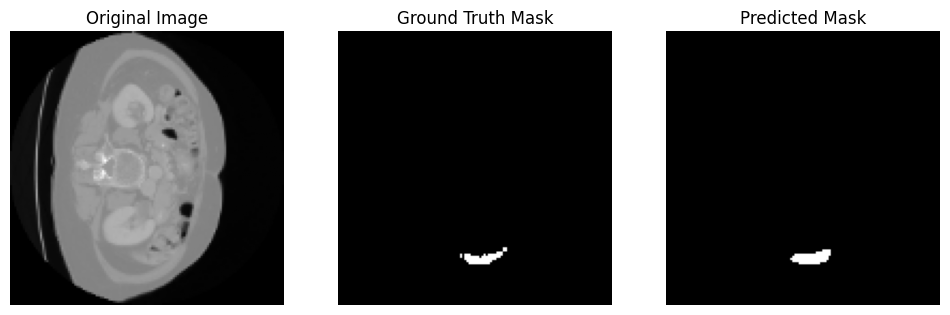

In [104]:
show_first_nonzero_slice(threshold=0.5)


In [81]:
import segmentation_models_pytorch as smp

# FCN ŸÖÿπ encoder pre-trained
model = smp.FPN(  # ŸÖÿ®ÿØÿ¶ŸäŸãÿß ŸÜÿ≥ÿ™ÿÆÿØŸÖ FPN ŸÑÿ£ŸÜ smp ŸÖÿ¥ ŸÅŸäŸá FCN ŸÖÿ≠ÿØÿØÿå FPN ŸÖÿ¥ÿßÿ®Ÿá
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=1,
    classes=1
).to(device)


In [82]:
# Loss
loss_fn = smp.losses.DiceLoss(mode='binary', from_logits=True)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [83]:
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for images, masks in train_loader:
        images = images.to(device, dtype=torch.float32)
        masks  = masks.to(device, dtype=torch.float32)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, masks)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}")


KeyboardInterrupt: 

In [84]:
import numpy as np
import torch

# ÿØŸàÿßŸÑ ÿßŸÑÿ™ŸÇŸäŸäŸÖ
def dice_coef(pred, target, smooth=1e-6):
    pred = pred.flatten()
    target = target.flatten()
    intersection = (pred * target).sum()
    return (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)

def iou_score(pred, target, smooth=1e-6):
    pred = pred.flatten()
    target = target.flatten()
    intersection = (pred * target).sum()
    union = pred.sum() + target.sum() - intersection
    return (intersection + smooth) / (union + smooth)

def accuracy(pred, target):
    pred = (pred > 0.5).astype(np.float32)
    return (pred == target).mean()

# ÿßŸÑÿ™ŸÇŸäŸäŸÖ ÿπŸÑŸâ val_loader
model.eval()
dice_list = []
iou_list  = []
acc_list  = []

with torch.no_grad():
    for images, masks in val_loader:
        images = images.to(device, dtype=torch.float32)
        masks  = masks.to(device, dtype=torch.float32)

        outputs = torch.sigmoid(model(images))
        outputs_np = outputs.cpu().numpy()
        masks_np   = masks.cpu().numpy()

        for i in range(outputs_np.shape[0]):
            pred_i = (outputs_np[i,0] > 0.5).astype(np.float32)
            mask_i = masks_np[i,0].astype(np.float32)

            dice_list.append(dice_coef(pred_i, mask_i))
            iou_list.append(iou_score(pred_i, mask_i))
            acc_list.append(accuracy(pred_i, mask_i))

print(f"Dice: {np.mean(dice_list):.4f}")
print(f"IoU:   {np.mean(iou_list):.4f}")
print(f"Accuracy: {np.mean(acc_list):.4f}")


Dice: 0.8148
IoU:   0.7831
Accuracy: 0.9903


In [85]:
import matplotlib.pyplot as plt

def show_first_nonzero_slice(threshold=0.5):
    # ÿßŸÑÿ®ÿ≠ÿ´ ÿπŸÜ ÿ£ŸàŸÑ slice ŸÅŸäŸá mask != 0
    for idx in range(len(dataset)):
        _, mask = dataset[idx]
        mask = mask[0].numpy()
        if np.max(mask) > 0:   # ŸÅŸäŸá ÿπÿ∂Ÿà
            slice_idx = idx
            break

    image, mask = dataset[slice_idx]
    image = image[0].numpy().astype(np.float32)
    mask  = mask[0].numpy().astype(np.float32)

    # Normalize ÿßŸÑÿµŸàÿ±ÿ©
    if np.max(image) > 0:
        image = image / np.max(image)

    # Prediction
    model.eval()
    with torch.no_grad():
        input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
        pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()
        pred_bin = (pred > threshold).astype(np.float32)
        mask_bin = (mask > 0).astype(np.float32)

    # ÿπÿ±ÿ∂
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Ground Truth Mask")
    plt.imshow(mask_bin, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title("Predicted Mask")
    plt.imshow(pred_bin, cmap='gray')
    plt.axis('off')

    plt.show()


In [86]:
image = image[0].numpy().astype(np.float32)
if np.max(image) > 0:
    image = image / np.max(image)


In [87]:
model.eval()
with torch.no_grad():
    input_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
    pred = torch.sigmoid(model(input_tensor)).cpu()[0,0].numpy()


In [88]:
pred_bin = (pred > 0.2).astype(np.float32)



In [89]:
torch.save(model.state_dict(), "fcn_pretrained.pth")



In [90]:
# ÿ™ÿπÿ±ŸäŸÅ ÿßŸÑŸÖŸàÿØŸäŸÑ ŸÜŸÅÿ≥Ÿá ÿ≤Ÿä ŸÇÿ®ŸÑ ŸÉÿØŸá
import segmentation_models_pytorch as smp

model = smp.FPN(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=1,
    classes=1
).to(device)

# ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑÿ£Ÿàÿ≤ÿßŸÜ ÿßŸÑÿ≥ÿßÿ®ŸÇÿ©
model.load_state_dict(torch.load("fcn_pretrained.pth"))


<All keys matched successfully>

In [91]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = smp.losses.DiceLoss(mode='binary', from_logits=True)



In [95]:
num_additional_epochs = 3  # ŸÖÿ´ŸÑÿßŸã ŸÜÿ≤ŸàÿØ 20 epoch

for epoch in range(num_additional_epochs):
    model.train()
    epoch_loss = 0

    for images, masks in train_loader:
        images = images.to(device, dtype=torch.float32)
        masks  = masks.to(device, dtype=torch.float32)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, masks)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_additional_epochs}, Loss: {epoch_loss/len(train_loader):.4f}")


Epoch 1/3, Loss: 0.1041
Epoch 2/3, Loss: 0.0853
Epoch 3/3, Loss: 0.0790


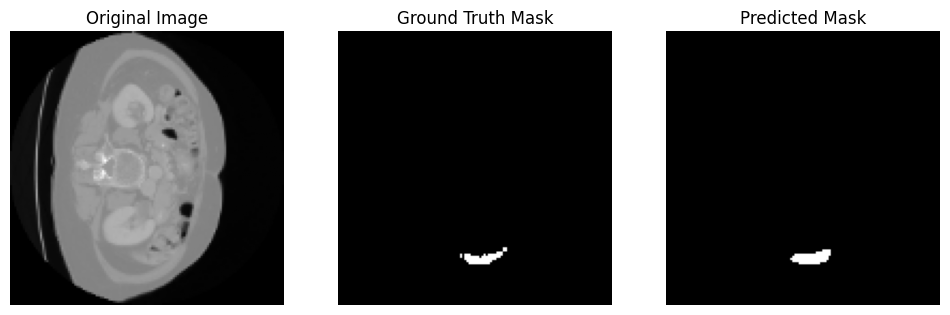

In [105]:
show_first_nonzero_slice(threshold=0.5)


In [97]:
import vtk
import numpy as np

def visualize_3d_mask(mask_np, spacing=(1.0, 1.0, 1.0), color=(1,0,0)):
    """
    mask_np: 3D numpy array, binary
    spacing: voxel spacing in mm
    color: RGB tuple (0-1)
    """

    # Convert numpy to VTK image
    data_importer = vtk.vtkImageImport()
    mask_string = mask_np.tostring()
    data_importer.CopyImportVoidPointer(mask_string, len(mask_string))
    data_importer.SetDataScalarTypeToUnsignedChar()
    data_importer.SetNumberOfScalarComponents(1)
    data_importer.SetDataExtent(0, mask_np.shape[2]-1,
                                0, mask_np.shape[1]-1,
                                0, mask_np.shape[0]-1)
    data_importer.SetWholeExtent(0, mask_np.shape[2]-1,
                                 0, mask_np.shape[1]-1,
                                 0, mask_np.shape[0]-1)
    data_importer.SetDataSpacing(spacing)

    # Marching cubes
    mc = vtk.vtkMarchingCubes()
    mc.SetInputConnection(data_importer.GetOutputPort())
    mc.SetValue(0, 0.5)  # iso-value between 0 and 1
    mc.Update()

    # Mapper & Actor
    mapper = vtk.vtkPolyDataMapper()
    mapper.SetInputConnection(mc.GetOutputPort())
    actor = vtk.vtkActor()
    actor.SetMapper(mapper)
    actor.GetProperty().SetColor(color)
    actor.GetProperty().SetOpacity(0.5)  # semi-transparent

    # Renderer
    renderer = vtk.vtkRenderer()
    renderer.AddActor(actor)
    renderer.SetBackground(0,0,0)

    # Render window
    render_window = vtk.vtkRenderWindow()
    render_window.AddRenderer(renderer)
    render_window.SetSize(800,800)

    # Interactor
    interactor = vtk.vtkRenderWindowInteractor()
    interactor.SetRenderWindow(render_window)
    interactor.Initialize()
    render_window.Render()
    interactor.Start()


In [98]:
import os
import torch

# ŸÜÿ≠ÿØÿØ ÿßŸÑŸÖŸÉÿßŸÜ
if "kaggle" in os.getcwd():
    # ÿ¥ÿ∫ÿßŸÑŸäŸÜ ÿ¨ŸàŸá ŸÉÿßÿ¨ŸÑ
    SAVE_DIR = "/kaggle/working/checkpoints"
else:
    # ÿ∫ÿßŸÑÿ®ÿßŸã ŸÅŸä ŸÉŸàŸÑÿßÿ®
    SAVE_DIR = "/content/drive/MyDrive/heart_seg_project/checkpoints"

# ŸÜÿ™ÿ£ŸÉÿØ ÿ•ŸÜ ÿßŸÑŸÅŸàŸÑÿØÿ± ŸÖŸàÿ¨ŸàÿØ
os.makedirs(SAVE_DIR, exist_ok=True)

# ŸÖÿ≥ÿßÿ± ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸàÿØŸäŸÑ
MODEL_PATH = os.path.join(SAVE_DIR, "unet_best.pth")

# ŸÜÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸàÿØŸäŸÑ
torch.save(model.state_dict(), MODEL_PATH)
print("‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸàÿØŸäŸÑ ŸÅŸä:", MODEL_PATH)


‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸàÿØŸäŸÑ ŸÅŸä: /content/drive/MyDrive/heart_seg_project/checkpoints/unet_best.pth


In [99]:
import os
import torch
import segmentation_models_pytorch as smp

# --------------------------
# 1. ÿ™ÿ≠ÿØŸäÿØ ŸÖŸÉÿßŸÜ ÿßŸÑÿ≠ŸÅÿ∏
# --------------------------
if "kaggle" in os.getcwd():
    # ŸÑŸà ÿ¥ÿ∫ÿßŸÑŸäŸÜ ÿπŸÑŸâ ŸÉÿßÿ¨ŸÑ
    SAVE_DIR = "/kaggle/working/checkpoints"
else:
    # ŸÑŸà ÿ¥ÿ∫ÿßŸÑŸäŸÜ ÿπŸÑŸâ ŸÉŸàŸÑÿßÿ®
    SAVE_DIR = "/content/drive/MyDrive/heart_seg_project/checkpoints"

os.makedirs(SAVE_DIR, exist_ok=True)
MODEL_PATH = os.path.join(SAVE_DIR, "unet_best.pth")


# --------------------------
# 2. ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸàÿØŸäŸÑ
# --------------------------
def save_model(model, path=MODEL_PATH):
    torch.save(model.state_dict(), path)
    print("‚úÖ ÿ™ŸÖ ÿ≠ŸÅÿ∏ ÿßŸÑŸÖŸàÿØŸäŸÑ ŸÅŸä:", path)


# --------------------------
# 3. ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÖŸàÿØŸäŸÑ
# --------------------------
def load_model(path=MODEL_PATH, n_classes=4, in_channels=1, device="cuda"):
    model = smp.Unet(
        encoder_name="resnet34",
        encoder_weights=None,  # ÿπŸÑÿ¥ÿßŸÜ ŸáŸÜÿ≠ŸÖŸÑ ÿßŸÑÿ£Ÿàÿ≤ÿßŸÜ ÿ®ÿ™ÿßÿπÿ™ŸÜÿß
        in_channels=in_channels,
        classes=n_classes
    )
    model.load_state_dict(torch.load(path, map_location=device))
    model.to(device)
    model.eval()
    print("‚úÖ ÿ™ŸÖ ÿ™ÿ≠ŸÖŸäŸÑ ÿßŸÑŸÖŸàÿØŸäŸÑ ŸÖŸÜ:", path)
    return model
